# Titanic

This is one of the kaggle competitions.

## Competition Description ([by kaggle web site]((https://www.kaggle.com/c/titanic)))

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data
The data has been split into two groups:

### **training set (train.csv)**

### **test set (test.csv)**

The *training set* should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The *test set* should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## (1) Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import cross_validation

/Users/Hanriver0618/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## (2) Load Files

In [3]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

### File check...!!

The following tasks can be used for checking...!

`.head()` : partially show

`.shape` : dimension

`.info()` : data type

`.describe()` : count,min,max,25%...

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Numerical Features
`PassengerId, Pcalss, Age, SibSp, Parch, Fare`
* Continous: `Age, Fare, Pclass`  
* Discrete: `SibSp, Parch`

### non-Numerical Features

`Name, Sex, Ticket, Cabin, Embarked`

### Categorical Features
`Survived, Sex, Embarked`

### Ordinal
`Pclass`

## (3) Correlation Function

In [10]:
numtrain = train.select_dtypes(include=[np.number])
numtrain.shape

(891, 7)

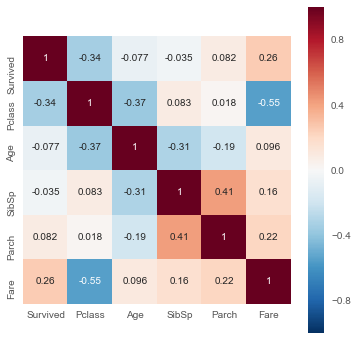

In [14]:
corr = numtrain.drop(['PassengerId'],axis=1).corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, vmax=1, square=True,annot=True)

## (04) Visulaizations

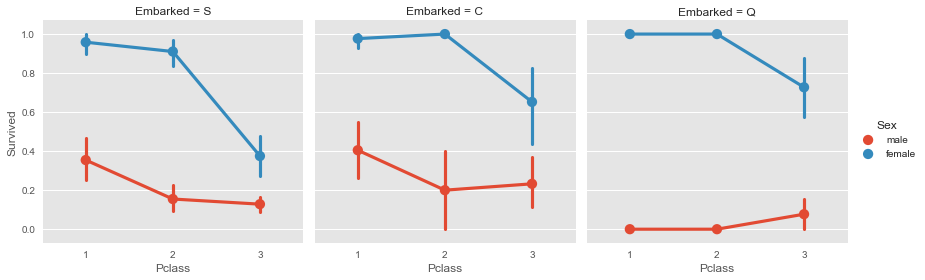

In [19]:
plt.figure(figsize=(4,4))
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',col_wrap=3, data=train)

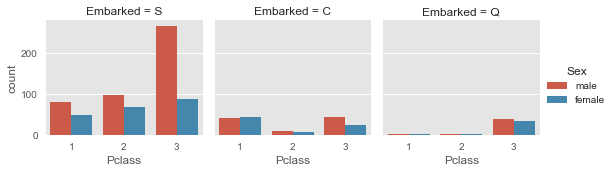

In [16]:
plt.figure(figsize=(4,4))
sns.factorplot('Pclass',hue='Sex',col='Embarked',col_wrap=3, data=train,kind='count',size=2.5)

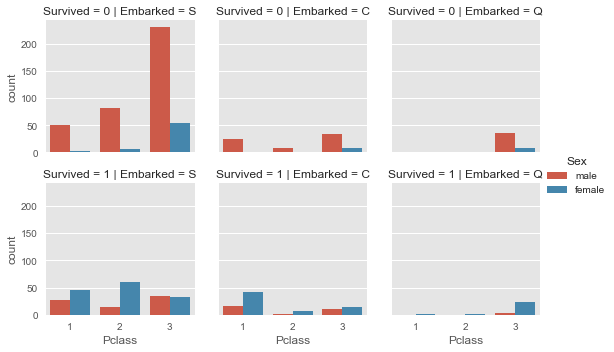

In [20]:
plt.figure(figsize=(4,4))
g=sns.factorplot('Pclass',hue='Sex',col='Embarked',row='Survived',data=train,kind='count',size=2.5)

### Sibling

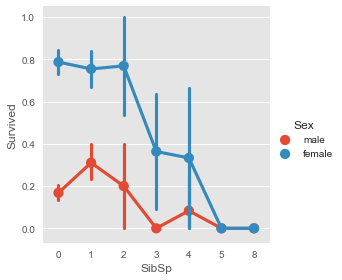

In [21]:
plt.figure(figsize=(4,4))
g= sns.factorplot('SibSp','Survived',hue='Sex',data=train)

### Parch

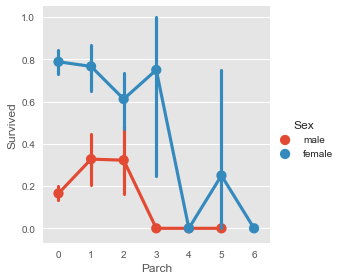

In [22]:
sns.factorplot('Parch','Survived',hue='Sex',data=train)

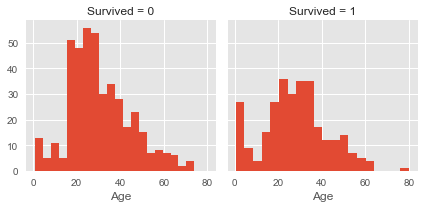

In [23]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

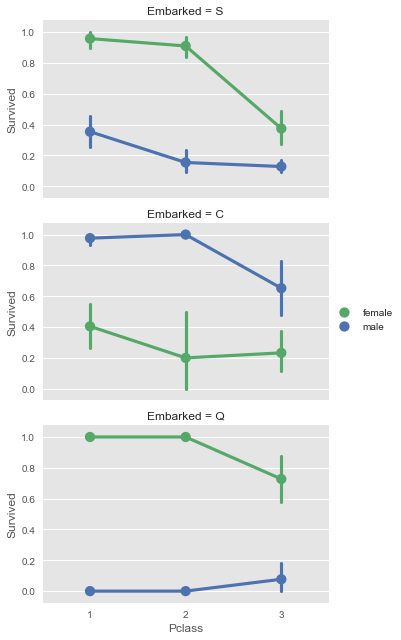

In [27]:
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

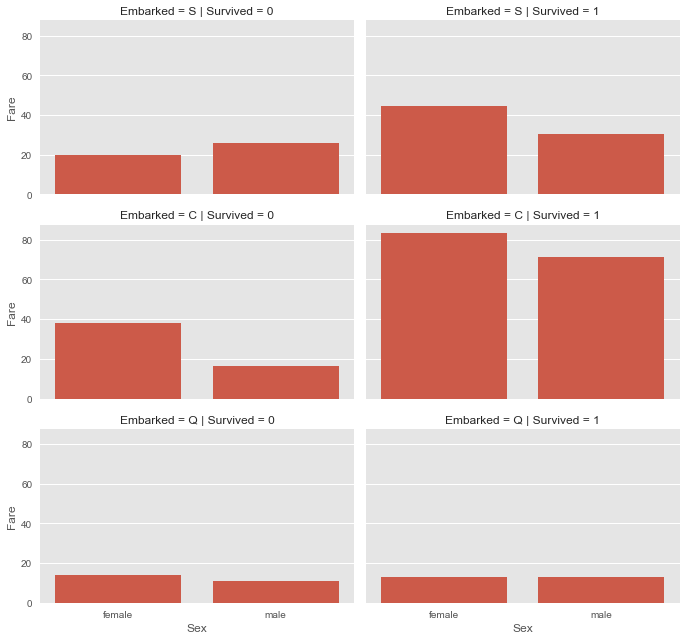

In [29]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived',aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

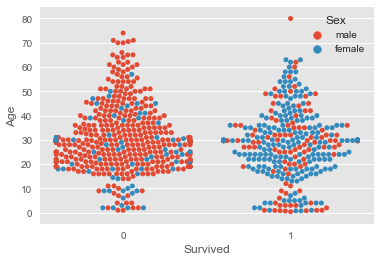

In [112]:
sns.swarmplot('Survived','Age',data=train,hue='Sex')

## (5) Missing Values

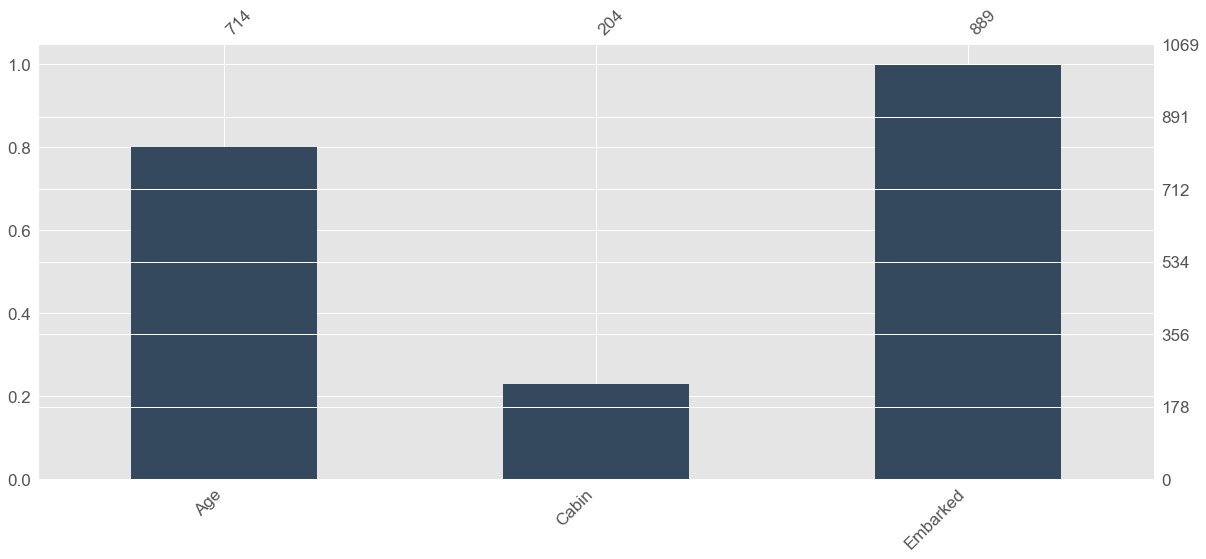

In [36]:
import missingno as msno
missingValueColumns = train.columns[train.isnull().any()].tolist()
msno.bar(train[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=17,labels=True,)

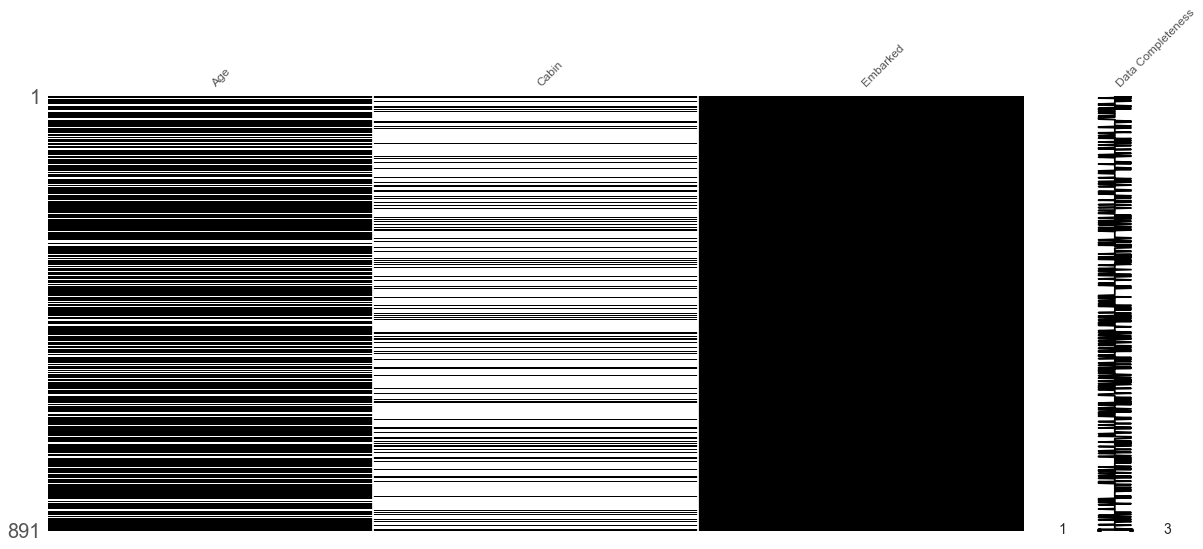

In [37]:
msno.matrix(train[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

In [55]:
mean_values = train.mean(axis=0)
train_new = train.fillna(mean_values,inplace=True)

In [56]:
mean_values = test.mean(axis=0)
test_new = test.fillna(mean_values,inplace=True)

Also, I will not use `Cabin` column because it has a lot of `NaN` data.

## (6) Machine Learning Model

In [57]:
X_train = train_new.drop(["Survived", 'PassengerId','Cabin', 'Ticket','Name'], axis=1)
Y_train = train_new["Survived"]
X_test  = test_new.drop(['PassengerId','Cabin', 'Ticket','Name'], axis=1).copy()
X_train.shape,Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [58]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [59]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [60]:
X_train.shape,Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

I will apply some of `categorical model` using `scikit` packages.

### Logistic Regression

In [105]:
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
Y_pred = model_log.predict(X_test)
logreg.score(X_train, Y_train)

0.80359147025813693

In [102]:
pd.DataFrame({'columns1': X_test.columns, 'columns2': model_log.coef_[0]})

,columns1,columns2
0,Pclass,-0.961757
1,Age,-0.033896
2,SibSp,-0.309504
3,Parch,-0.092476
4,Fare,0.003136
5,Sex_female,2.220984
6,Sex_male,-0.413756
7,Embarked_C,0.655997
8,Embarked_Q,0.548077
9,Embarked_S,0.258614


Sex is the highest coefficient to affect whether the person was survived. 

Try to run different models.

### Support Vector Machine

In [106]:
model_svc = SVC()
model_svc.fit(X_train, Y_train)
Y_pred = model_svc.predict(X_test)
model_svc.score(X_train, Y_train)

0.89001122334455662

### KNN

In [109]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, Y_train)
Y_pred = model_knn.predict(X_test)
model_knn.score(X_train, Y_train)

0.83613916947250277